# Dedup by Location (address) and Name information
We got pretty clean data from the previous part. In this notebook, I will detect duplicated values by grouping rows by address information.

## Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_colwidth',-1)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Load in the data from part 02

In [2]:
data = pd.read_csv('02out')
data.head()

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,Location,Location Info,Island,Website,Contact,Phone,Email,col1,col3,col9,City
0,Waialua Farmers' Market,NaN,NaN,NaN,NaN,NaN,NaN,8:30 AM to 12:00 PM,8:30 AM to 12:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,info@sugarmillhawaii.com,Waialua Sugar Mill Edith Ramiscal,NaN,NaN,NaN
1,Kekaha Neighborhood Center (Sunshine Markets),NaN,NaN,NaN,NaN,NaN,NaN,9:00 AM,9:00 AM,NaN,NaN,NaN,NaN,Cora Asuncion,(808) 742-1834,NaN,"Elepaio Road, Kekaha",NaN,NaN,Kekaha
2,Hali'imaile Farmers' Market,NaN,NaN,NaN,NaN,NaN,1:00 PM to 6:00 PM,NaN,1:00 PM to 6:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hali'imaile Town Center (in a former Maui Pineapple Co. parking lot next to Hali'imaile General Store),NaN,NaN,NaN
3,Mahiku Farmers' Market,NaN,NaN,NaN,NaN,4:00 PM to 8:00 PM,NaN,NaN,4:00 PM to 8:00 PM,NaN,NaN,NaN,www.mahikufarmersmarket.com,Sonny Doung,(808) 225-4002,sonnydoung@hotmail.com,International Market Place-Waikiki (near the Food Court),NaN,NaN,NaN
4,Country Market & Craft Fair at Waimanalo Homestead Community Center,9:00 AM to 4:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,9:00 AM to 4:00 PM,1330 Kalanianaole Hwy,Waimanalo Homestead Community Center,Oahu,NaN,Paul Richard,"(808) 259-8611, (808) 284-2575",NaN,NaN,NaN,NaN,NaN


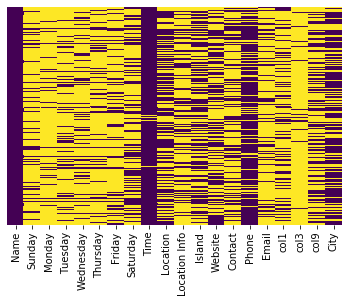

In [3]:
sns.heatmap(data.isna(), cmap='viridis', cbar=False, yticklabels=False)

In [4]:
#Reorder columns
data = data[['Name','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Time',
             'col3','Location','City','Location Info','col1','Island','col9','Website','Contact',
             'Phone','Email']]

## Group data by location

First, we need to pick rows with non-missing address information. Then replace all missing data (Nans) with blanks, so that we can get the aggregation for each group.

In [5]:
#Select rows that have non-missing location
data_loc = data[data['Location'].notna()]

In [6]:
#Replace missing values with blanks
data_loc = data_loc.replace(np.nan, '')

The aggregation should join unique strings only.

In [7]:
#Group data by location and join unique values in each columns
data_loc = data_loc.groupby('Location').agg(lambda x: '; '.join(set(x))).reset_index()
data_loc[data_loc.columns] = data_loc.apply(lambda x: x.str.strip('; '))

In [8]:
#Reorder columns
data_loc = data_loc[['Name','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Time',
                     'col3','Location','City','Location Info','col1','Island','col9','Website','Contact',
                     'Phone','Email']]

Let's see which columns have multiple values in one row

In [9]:
#Check which columns have joined values
print('Grouped Columns:')
for col in data_loc:
    if (data_loc[col].str.contains(';', na=False)).any() == True:
        print(col + ': ' + str(data_loc[col].str.contains(';', na=False).sum()) +
              ' record(s). Max: ' + str(data_loc[col].str.count(';').max()) + ' ocurrence(s)')

Grouped Columns:
Name: 8 record(s). Max: 1 ocurrence(s)
Location Info: 2 record(s). Max: 1 ocurrence(s)
Website: 1 record(s). Max: 1 ocurrence(s)
Contact: 1 record(s). Max: 1 ocurrence(s)
Phone: 1 record(s). Max: 1 ocurrence(s)


### Compare rows that have more than one names

In [10]:
#Print out all Name values of which have more than one name
data_loc[data_loc['Name'].str.contains(';', na=False)][['Name']]

,Name
4,Country Market & Craft Fair at Waimanalo Homestead Community Center; Country Market & Craft Fair
20,Nuuanu Farmers Market; Nuuanu Farmers Market at Honolulu Central Seventh Day Adventist Church
21,International Market Place (Next to the Food Court); International Market Place
27,"Kailua Elementary School; Kailua Elementary School (Opening March 10, 2012)"
41,Hawaii Kai Farmers' Market; Hawaii Kai Farmers' Market at Kaiser High School
47,Hawaiian Homestead Farmers’ Market at Kuhio Hale Building; Hawaiian Homestead Farmers’ Market
51,Mahiku Farmers' Market at Momilani Community Center; Mahiku Farmers' Market
57,Merchant Street Market; Davies Pacific Center


This quite not so effective but I couldn't think of any better ways. I will go over each name pair in the 02out dataset and then pick the right one to keep in the data_loc dataset.

In [11]:
#Check name in row 4
data[(data['Name'] == 'Country Market & Craft Fair') |
     (data['Name'] == 'Country Market & Craft Fair at Waimanalo Homestead Community Center')]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
4,Country Market & Craft Fair at Waimanalo Homestead Community Center,9:00 AM to 4:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,9:00 AM to 4:00 PM,NaN,1330 Kalanianaole Hwy,NaN,Waimanalo Homestead Community Center,NaN,Oahu,NaN,NaN,Paul Richard,"(808) 259-8611, (808) 284-2575",NaN
83,Country Market & Craft Fair,9:00 AM to 4:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,9:00 AM to 4:00 PM,NaN,1330 Kalanianaole Hwy,NaN,Waimanalo Homestead Community Center,NaN,NaN,NaN,NaN,Tong Sang,"(808) 259-8611, (808) 259-7602, (808) 284-2575",NaN


In [12]:
#Adjust name in row 4
data_loc.loc[4][['Name','Contact','Phone']] = data.loc[4][['Name','Contact','Phone']]

In [13]:
#Check row in 20
data[(data['Name'] == 'Nuuanu Farmers Market') |
     (data['Name'] == 'Nuuanu Farmers Market at Honolulu Central Seventh Day Adventist Church')]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
147,Nuuanu Farmers Market,NaN,NaN,4:00 PM to 7:00 PM,NaN,NaN,NaN,NaN,4:00 PM to 7:00 PM,NaN,2313 Nuuanu Avenue,Honolulu,NaN,Honolulu Central Seventh Day Adventist Church,NaN,NaN,NaN,NaN,(808) 282-2276,nuuanumarket@gmail.com
205,Nuuanu Farmers Market at Honolulu Central Seventh Day Adventist Church,NaN,NaN,4:00 PM to 7:00 PM,NaN,NaN,NaN,NaN,4:00 PM to 7:00 PM,NaN,2313 Nuuanu Avenue,Honolulu,NaN,NaN,Oahu,"(21.326480443000435, -157.84731928399975)",NaN,NaN,(808) 282-2276,nuuanumarket@gmail.com


In [14]:
#Adjust name in row 20
data_loc.loc[20]['Name'] = data.loc[205]['Name']

In [15]:
#Check name in row 21
data[(data['Name'] == 'International Market Place (Next to the Food Court)') |
     (data['Name'] == 'International Market Place')]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
8,International Market Place,NaN,NaN,NaN,NaN,4:00 PM to 8:00 PM,NaN,NaN,4:00 PM to 8:00 PM,NaN,2330 Kalakaua Avenue,Honolulu,Next to Food Court,NaN,Oahu,"(21.277500376000432, -157.82711977399973)",NaN,NaN,NaN,NaN
214,International Market Place (Next to the Food Court),NaN,NaN,NaN,NaN,4:00 PM to 8:00 PM,NaN,NaN,4:00 PM to 8:00 PM,NaN,2330 Kalakaua Avenue,Honolulu,NaN,NaN,NaN,NaN,www.mahikufarmersmarket.com,Sonny Doung,(808) 225-4002,sonnydoung@hotmail.com


In [16]:
#Adjust name in row 21
data_loc.loc[21]['Name'] = data.loc[8]['Name']

In [17]:
#Check name in row 27
data[(data['Name'] == 'Kailua Elementary School') |
     (data['Name'] == 'Kailua Elementary School (Opening March 10, 2012)')]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
31,"Kailua Elementary School (Opening March 10, 2012)",NaN,NaN,NaN,NaN,NaN,NaN,4:00 PM to 8:00 PM,4:00 PM to 8:00 PM,NaN,315 Kuulei Road,Kailua-Kona,parking lot,NaN,NaN,NaN,www.mahikufarmersmarket.com,Sonny Doung,(808) 225-4002,sonnydoung@hotmail.com
141,Kailua Elementary School,NaN,NaN,NaN,NaN,NaN,NaN,4:00 PM to 8:00 PM,4:00 PM to 8:00 PM,NaN,315 Kuulei Road,NaN,NaN,NaN,Oahu,NaN,www.mahikufarmersmarket.com,Sonny Doung,(808) 225-4002,sonnydoung@hotmail.com


In [18]:
#Adjust name in row 27
data_loc.loc[27]['Name'] = data.loc[141]['Name']

In [19]:
#Check name in row 41
data[(data['Name'] == "Hawaii Kai Farmers' Market at Kaiser High School") |
     (data['Name'] == "Hawaii Kai Farmers' Market")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
119,Hawaii Kai Farmers' Market,NaN,NaN,NaN,NaN,NaN,NaN,9:00 AM to 1:00 PM,9:00 AM to 1:00 PM,NaN,511 Lunalilo Home Road,NaN,NaN,at Kaiser High School in Hawaii Kai,NaN,NaN,www.makekeomaunalua.com,NaN,(808) 388-9696,NaN
177,Hawaii Kai Farmers' Market at Kaiser High School,NaN,NaN,NaN,NaN,NaN,NaN,9:00 AM to 1:00 PM,9:00 AM to 1:00 PM,NaN,511 Lunalilo Home Road,Honolulu,Kaiser High School parking lot,NaN,Oahu,"(21.286071053000455, -157.69769887499973)",www.makekeomaunalua.com,NaN,(808) 388-9696,NaN


In [20]:
#Adjust name in row 41
data_loc.loc[41]['Name'] = data.loc[177]['Name']

In [21]:
#Check name in row 47
data[(data['Name'] == "Hawaiian Homestead Farmers’ Market at Kuhio Hale Building") |
     (data['Name'] == "Hawaiian Homestead Farmers’ Market")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
9,Hawaiian Homestead Farmers’ Market at Kuhio Hale Building,NaN,NaN,NaN,NaN,NaN,NaN,7:00 AM to 12:00 PM,7:00 AM to 12:00 PM,NaN,64-759 Kahilu Road,Waimea,NaN,NaN,Hawaii,NaN,NaN,NaN,NaN,NaN
61,Hawaiian Homestead Farmers’ Market,NaN,NaN,NaN,NaN,NaN,NaN,7:00 AM to 12:00 PM,7:00 AM to 12:00 PM,NaN,64-759 Kahilu Road,Waimea,located at Kuhio Hale Building,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#Adjust name in row 47
data_loc.loc[47]['Name'] = data.loc[9]['Name']

In [23]:
#Check name in row 51
data[(data['Name'] == "Mahiku Farmers' Market at Momilani Community Center") |
     (data['Name'] == "Mahiku Farmers' Market")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
3,Mahiku Farmers' Market,NaN,NaN,NaN,NaN,4:00 PM to 8:00 PM,NaN,NaN,4:00 PM to 8:00 PM,NaN,NaN,NaN,NaN,International Market Place-Waikiki (near the Food Court),NaN,NaN,www.mahikufarmersmarket.com,Sonny Doung,(808) 225-4002,sonnydoung@hotmail.com
24,Mahiku Farmers' Market at Momilani Community Center,NaN,NaN,NaN,NaN,NaN,3:00 PM to 7:00 PM,NaN,3:00 PM to 7:00 PM,NaN,715 Hoomoana St,Pearl City,corner of Hoomoana & Komo Mai Dr,NaN,Oahu,"(21.408970034000447, -157.96024986999973)",www.mahikufarmersmarket.com,Sonny Doung,(808) 225-4002,sonnydoung@hotmail.com
59,Mahiku Farmers' Market,NaN,NaN,NaN,NaN,NaN,3:00 PM to 7:00 PM,NaN,3:00 PM to 7:00 PM,NaN,715 Hoomoana St,Pearl City,corner of Hoomoana & Komo Mai Dr.,Momilani Community Center,NaN,NaN,NaN,Sonny Doung,(808) 225-4002,sonnydoung@hotmail.com


In [24]:
#Adjust name in row 51
data_loc.loc[51]['Name'] = data.loc[24]['Name']

In [25]:
#Check name in row 57
data[(data['Name'] == 'Merchant Street Market') |
     (data['Name'] == 'Davies Pacific Center')]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
35,Davies Pacific Center,NaN,NaN,10:00 AM to 1:00 PM,NaN,NaN,NaN,NaN,10:00 AM to 1:00 PM,2nd and 4th Tuesdays,841 Bishop Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,Merchant Street Market,NaN,NaN,10:00 AM to 1:00 PM,NaN,NaN,NaN,NaN,10:00 AM to 1:00 PM,2nd and 4th Tuesdays,841 Bishop Street,Honolulu,NaN,NaN,Oahu,"(21.307830753000474, -157.86242916299975)",NaN,NaN,(808) 545-4477,dpcinfo@isleconcierge.com
105,Davies Pacific Center,NaN,NaN,10:00 AM to 1:00 PM,NaN,NaN,NaN,NaN,10:00 AM to 1:00 PM,2nd and 4th Tuesdays,841 Bishop Street,Honolulu,NaN,NaN,Oahu,"(21.307830753000474, -157.86242916299975)",NaN,NaN,NaN,NaN
137,Merchant Street Market,NaN,NaN,10:00 AM to 1:00 PM,NaN,NaN,NaN,NaN,10:00 AM to 1:00 PM,2nd and 4th Tuesdays,841 Bishop Street,Honolulu,NaN,NaN,NaN,NaN,NaN,NaN,(808) 545-4477,dpcinfo@isleconcierge.com


These are two different market, so I will recreate these two in data_loc

In [26]:
#Adjust name in row 57
data_loc.loc[57]['Name'] = data.loc[40]['Name']

In [27]:
#Check how many rows in this data
len(data_loc)

72

In [28]:
#Add additional row
data_loc.loc[72] = data.loc[105]

### Compare rows that have more than one location information values

In [29]:
#Print out all Name values of which have more than one location information values
data_loc[data_loc['Location Info'].str.contains(';', na=False)][['Location Info']]

,Location Info
13,"Between Mile Markers 12 & 13; Hilo Coffee Mill Farm, Between Mile Markers 12 & 13"
51,corner of Hoomoana & Komo Mai Dr; corner of Hoomoana & Komo Mai Dr.


In [30]:
#Check location information in row 13
data[(data['Location Info'] == 'Between Mile Markers 12 & 13') |
     (data['Location Info'] == 'Hilo Coffee Mill Farm, Between Mile Markers 12 & 13')]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
53,"Hilo Coffee Mill ""Market @ The Mill""",NaN,NaN,NaN,NaN,NaN,NaN,8:00 AM to 1:00 PM,8:00 AM to 1:00 PM,NaN,17-995 Volcano Rd,NaN,"Hilo Coffee Mill Farm, Between Mile Markers 12 & 13",NaN,Hawaii,NaN,NaN,Katherine Patton,(808) 968-1333,NaN
127,"Hilo Coffee Mill ""Market @ The Mill""",NaN,NaN,NaN,NaN,NaN,NaN,8:00 AM to 1:00 PM,8:00 AM to 1:00 PM,NaN,17-995 Volcano Rd,NaN,Between Mile Markers 12 & 13,Hilo Coffee Mill Farm,NaN,NaN,NaN,Katherine Patton,(808) 968-1333,NaN


In [31]:
#Adjust location information in row 13
data_loc.loc[13]['Location Info'] = data.loc[53]['Location Info']

In [32]:
#Check location information in row 51
data[(data['Location Info'] == 'corner of Hoomoana & Komo Mai Dr.') |
     (data['Location Info'] == 'corner of Hoomoana & Komo Mai Dr')]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
24,Mahiku Farmers' Market at Momilani Community Center,NaN,NaN,NaN,NaN,NaN,3:00 PM to 7:00 PM,NaN,3:00 PM to 7:00 PM,NaN,715 Hoomoana St,Pearl City,corner of Hoomoana & Komo Mai Dr,NaN,Oahu,"(21.408970034000447, -157.96024986999973)",www.mahikufarmersmarket.com,Sonny Doung,(808) 225-4002,sonnydoung@hotmail.com
59,Mahiku Farmers' Market,NaN,NaN,NaN,NaN,NaN,3:00 PM to 7:00 PM,NaN,3:00 PM to 7:00 PM,NaN,715 Hoomoana St,Pearl City,corner of Hoomoana & Komo Mai Dr.,Momilani Community Center,NaN,NaN,NaN,Sonny Doung,(808) 225-4002,sonnydoung@hotmail.com


In [33]:
#Adjust location information in row 51
data_loc.loc[51]['Location Info'] = data.loc[24]['Location Info']

### Compare rows that have more than one websites

In [34]:
#Print out all Name values of which have more than one websites
data_loc[data_loc['Website'].str.contains(';', na=False)][['Website']]

,Website
59,"www.waianaefarmersmarket.org; www.waianaefarmersmarket.org, www.facebook.com/#!/pages/WAIANAE-FARMERS-MARKET/234161083106"


In [35]:
#Check website information in row 59
data[(data['Website'] == 'www.waianaefarmersmarket.org') |
     (data['Website'] == 'www.waianaefarmersmarket.org, '\
      'www.facebook.com/#!/pages/WAIANAE-FARMERS-MARKET/234161083106')]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
197,Waianae Farmers' Market (sponsored by Waianae Coast Comprehensive Center),NaN,NaN,NaN,NaN,NaN,NaN,8:30 AM to 11:30 AM,8:30 AM to 11:30 AM,NaN,85-251 Farrington Highway,Waianae,"Waianae High School, Cafeteria Lanai",NaN,Oahu,"(21.455940520000468, -158.19946945199973)",www.waianaefarmersmarket.org,Desiree,(808) 388-7386,waianaefarmersmarket@wcchc.com
202,Waianae Farmers' Market (sponsored by Waianae Coast Comprehensive Center),NaN,NaN,NaN,NaN,NaN,NaN,8:30 AM to 11:30 AM,8:30 AM to 11:30 AM,NaN,85-251 Farrington Highway,Waianae,NaN,"Waianae High School, Cafeteria Lanai",NaN,NaN,"www.waianaefarmersmarket.org, www.facebook.com/#!/pages/WAIANAE-FARMERS-MARKET/234161083106",Desiree,(808) 388-7386,waianaefarmersmarket@wcchc.com


In [36]:
#Adjust website information in row 59
data_loc.loc[59]['Website'] = data.loc[197]['Website']

### Check if there're still rows that have more than one contact names or phone numbers

In [37]:
data_loc['Contact'].str.contains(';', na=False).any()

False

In [38]:
data_loc['Phone'].str.contains(';', na=False).any()

False

## Group data by Name

After we get unique rows for markets that have same location, we can append it back to the 02out data that have missing location information

In [39]:
#Concatenate two data frames
data = data[data['Location'].isna()].append(data_loc)

In [40]:
#Reset index
data.reset_index(drop=True,inplace=True)

These following steps are the same as above part. We will group data by Name

In [41]:
#Replace Nans with blanks
data = data.replace(np.nan, '')

In [42]:
#Group data by name and join unique values in each columns
data_name = data.groupby('Name').agg(lambda x: '; '.join(set(x))).reset_index()
data_name[data_name.columns] = data_name.apply(lambda x: x.str.strip('; '))

In [43]:
#Check which columns have joined values
print('Grouped Columns:')
for col in data_name:
    if (data_name[col].str.contains(';', na=False)).any() == True:
        print(col + ': ' + str(data_name[col].str.contains(';', na=False).sum()) +
              ' record(s). Max: ' + str(data_name[col].str.count(';').max()) + ' ocurrence(s)')

Grouped Columns:
Wednesday: 1 record(s). Max: 1 ocurrence(s)
Time: 2 record(s). Max: 2 ocurrence(s)
Location: 3 record(s). Max: 1 ocurrence(s)
Location Info: 1 record(s). Max: 1 ocurrence(s)
col1: 1 record(s). Max: 1 ocurrence(s)
Phone: 1 record(s). Max: 1 ocurrence(s)
Email: 1 record(s). Max: 1 ocurrence(s)


### Compare rows that have joined values

In [44]:
#Print out names that have more than one Wednesday time
data_name[data_name['Wednesday'].str.contains(';', na=False)][['Name']]

,Name
68,Makawao Farmers' Market


In [45]:
#Check rows that have name of index 68
data[data['Name'] == "Makawao Farmers' Market"]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
117,Makawao Farmers' Market,,,,9:30 AM to 2:00 PM,,,,9:30 AM to 2:00 PM,,200 Olinda Rd,Makawao,Po'okela Church on Olinda Road,,Maui,"(20.849390600000447, -156.30839892799975)",makawaofarmersmarket.org,Debbie,(808) 419-1570,
131,Makawao Farmers' Market,,,,10:00 AM to 5:00 PM,,,,10:00 AM to 5:00 PM,,3654 Baldwin Avenue,,,,,,,,,


These are two different markets, so I will recreate them in data_name

In [46]:
len(data_name)

129

In [47]:
data_name.loc[68] = data.loc[117]
data_name.loc[129] = data.loc[131]

In [48]:
#Print out names that have more than one Location information
data_name[data_name['Location'].str.contains(';', na=False)][['Name']]

,Name
71,Makiki Local Grown Farmers' Market at St. Clement's Church
125,Waipahu District Park (People's Open Market)


In [49]:
#Check rows that have name of index 71
data[data['Name'] == "Makiki Local Grown Farmers' Market at St. Clement's Church"]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
108,Makiki Local Grown Farmers' Market at St. Clement's Church,,,,,4:30 PM to 7:30 PM,,,4:30 PM to 7:30 PM,,1515 Wilder Avenue,Honolulu,Parking on Wilder after 5:30 p.m,,Oahu,"(21.30376089200047, -157.83456927999973)",,George Lee,(808) 735-4550,georgelee2468@gmail.com
109,Makiki Local Grown Farmers' Market at St. Clement's Church,,,,,4:30 PM to 7:30 PM,,,4:30 PM to 7:30 PM,,1515 Wilder Avenue at Makiki St,,Parking on Wilder after 5:30 p.m.,"Agent Juanita Kawamoto, Farm Fresh Hawaii",,,www.farmfreshhawaii.com,George Lee,(808) 735-4550,georgelee2468@gmail.com


In [50]:
#Adjust information in row 71
data_name.loc[71][['Location','Location Info','Website']] =  data.loc[109][['Location','Location Info','Website']]

In [51]:
#Check rows that have name of index 125
data[data['Name'] == "Waipahu District Park (People's Open Market)"]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
166,Waipahu District Park (People's Open Market),,,8:15 AM to 9:15 AM,,,,,8:15 AM to 9:15 AM,,94-230 Paiwa Stree,Waipahu,,,Oahu,"(21.38803075800047, -157.99936985699975)",www.co.honolulu.hi.us/parks/programs/pom,,(808) 522-7088,
167,Waipahu District Park (People's Open Market),,,8:15 AM to 9:15 AM,,,,,8:15 AM to 9:15 AM,,94-230 Paiwa Street,Waipahu,,,,,www.co.honolulu.hi.us/parks/programs/pom,,(808) 522-7088,


In [52]:
#Adjust information in row 125
data_name.loc[125]['Location'] = data.loc[167]['Location']

In [53]:
#Check if there're still more than one Location Info in a row
data_name['Location Info'].str.contains(';', na=False).any()

False

In [54]:
#Print out names that have more than one col1 information
data_name[data_name['col1'].str.contains(';', na=False)][['Name']]

,Name
22,Hanapepe Park (Sunshine Markets)


In [55]:
#Check rows that have name of index 22
data[data['Name'] == "Hanapepe Park (Sunshine Markets)"]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
12,Hanapepe Park (Sunshine Markets),,,,,3:00 PM,,,3:00 PM,,,,,in Old Hanapepe Town,Kauai,,,Cora Asuncion,(808) 742-1834,
44,Hanapepe Park (Sunshine Markets),,,,,3:00 PM,,,3:00 PM,,,,,Old Hanapepe Town,,,,Cora Asuncion,(808) 742-1834,


In [56]:
#Adjust information in row 22
data_name.loc[22]['col1'] =  data.loc[44]['col1']

In [57]:
#Print out names that have more than one email information
data_name[data_name['Email'].str.contains(';', na=False)][['Name']]

,Name
49,Kauai Community Market (Kauai Community College)


In [58]:
#Check rows that have name of index 49
data[data['Name'] == "Kauai Community Market (Kauai Community College)"]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
27,Kauai Community Market (Kauai Community College),,,,,,,10:00 AM to 1:00 PM,10:00 AM to 1:00 PM,,,,Campus front parking lot across from Grove Farm,,Kauai,,,Melissa McFerrin,(808) 337-9944,kcfb@hawaiiantel.ne
97,Kauai Community Market (Kauai Community College),,,,,,,10:00 AM to 1:00 PM,10:00 AM to 1:00 PM,,,,,Campus front parking lot across from Grove Farm,,,,Melissa McFerrin,(808) 337-9944,kcfb@hawaiiantel.net


In [59]:
#Adjust information in row 49
data_name.loc[49]['Email'] =  data.loc[97]['Email']

In [60]:
data_name.replace('^\s*$', np.nan, regex=True, inplace = True)

In [61]:
data_name.to_csv('03out',index=False)